Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. <strong>Сколько студентов успешно сдали только один курс?</strong> (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).


2. <strong>Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.</strong> (5 баллов)


3. <strong>По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).</strong> (5 баллов) 


4. <strong>Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).</strong> (8 баллов)


5. <strong>Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.</strong>  (10 баллов) 


6. <strong>Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут.</strong> (35 баллов)

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться курсом. Обосновать свой выбор ты можешь с помощью фактов сдачи экзаменов, распределения студентов и уникальный идентефикатор курса.

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Файлы: 

<b>assessments.csv</b> — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam)

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль)

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

<b>courses.csv</b> — файл содержит список предметов по семестрам.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

<b>studentAssessment.csv</b> — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

<b>studentRegistration.csv</b> — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [109]:
#импортирую библиотеки
import pandas as pd
import numpy as np
import scipy as scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np, scipy.stats as st
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.multicomp as ssm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import zscore
import pingouin as pg

In [4]:
path_to_file_1 = 'assessments.csv' #файл содержит информацию об оценках в тесте.
path_to_file_2 = 'courses.csv' #файл содержит список предметов по семестрам
path_to_file_3 = 'studentAssessment.csv' #файл содержит результаты тестов студентов
path_to_file_4 = 'studentRegistration.csv' #файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре

assessments = pd.read_csv(path_to_file_1) #переменная для датасета
courses = pd.read_csv(path_to_file_2)
student_assessment = pd.read_csv(path_to_file_3)
student_registration = pd.read_csv(path_to_file_4)

In [5]:
#далее смотрю на датасеты, что в них есть, какие типы данных

In [6]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [7]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [8]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [9]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [10]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [11]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [12]:
student_assessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [13]:
student_registration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

Данные выглядят пригодными к анализу без какой-либо предварительной обработки

In [14]:
#создам объединённые датасеты
courses_reg = pd.merge(courses,student_registration, on=['code_module', 'code_presentation'])
ocenki = pd.merge(courses_reg, assessments, on= ['code_module', 'code_presentation'])
full_ocenki = pd.merge(ocenki, student_assessment, on=['id_assessment', 'id_student'])

In [15]:
courses_reg.head()

,code_module,code_presentation,module_presentation_length,id_student,date_registration,date_unregistration
0,AAA,2013J,268,11391,-159.0,NaN
1,AAA,2013J,268,28400,-53.0,NaN
2,AAA,2013J,268,30268,-92.0,12.0
3,AAA,2013J,268,31604,-52.0,NaN
4,AAA,2013J,268,32885,-176.0,NaN


In [16]:
ocenki.head()

,code_module,code_presentation,module_presentation_length,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight
0,AAA,2013J,268,11391,-159.0,NaN,1752,TMA,19.0,10.0
1,AAA,2013J,268,11391,-159.0,NaN,1753,TMA,54.0,20.0
2,AAA,2013J,268,11391,-159.0,NaN,1754,TMA,117.0,20.0
3,AAA,2013J,268,11391,-159.0,NaN,1755,TMA,166.0,20.0
4,AAA,2013J,268,11391,-159.0,NaN,1756,TMA,215.0,30.0


In [17]:
full_ocenki.head()

,code_module,code_presentation,module_presentation_length,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,268,11391,-159.0,NaN,1752,TMA,19.0,10.0,18,0,78.0
1,AAA,2013J,268,11391,-159.0,NaN,1753,TMA,54.0,20.0,53,0,85.0
2,AAA,2013J,268,11391,-159.0,NaN,1754,TMA,117.0,20.0,115,0,80.0
3,AAA,2013J,268,11391,-159.0,NaN,1755,TMA,166.0,20.0,164,0,85.0
4,AAA,2013J,268,11391,-159.0,NaN,1756,TMA,215.0,30.0,212,0,82.0


<b>Курсом</b> я буду считать совокупность предметов в рамках двух семестров

In [138]:
#1 Сколько студентов успешно сдали только один курс?

In [139]:
#По условию, сдача экзамена - получение более 40 баллов. Смотрю сколько таких студентов
#смотрю только тип оценки EXAM и баллы выше 40
full_ocenki.query('assessment_type == "Exam" & score >= 40')

,code_module,code_presentation,module_presentation_length,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
46189,CCC,2014J,269,23698,-110.0,NaN,24299,Exam,NaN,100.0,243,0,80.0
46199,CCC,2014J,269,27116,-156.0,NaN,24299,Exam,NaN,100.0,243,0,96.0
46204,CCC,2014J,269,28787,-29.0,NaN,24299,Exam,NaN,100.0,243,0,44.0
46216,CCC,2014J,269,29420,-14.0,NaN,24299,Exam,NaN,100.0,244,0,62.0
46225,CCC,2014J,269,29639,-24.0,NaN,24299,Exam,NaN,100.0,248,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95950,DDD,2014B,241,2688692,-108.0,NaN,25361,Exam,241.0,100.0,234,0,51.0
95961,DDD,2014B,241,2692577,-23.0,NaN,25361,Exam,241.0,100.0,234,0,87.0
95966,DDD,2014B,241,2692948,-165.0,NaN,25361,Exam,241.0,100.0,238,0,53.0
95973,DDD,2014B,241,2694886,-22.0,NaN,25361,Exam,241.0,100.0,236,0,69.0


In [140]:
#выделяю уникальных студентов (не повторников)
full_ocenki.query('assessment_type == "Exam" & score >= 40').id_student.nunique()

4097

Получается, что 4097 студентов сдали экзамены успешно. Сдача экзамена <b>не_равно</b> сдача курса. Я буду придерживаться логики, что курс это два семестра.

In [141]:
#смотрю тех, кто успешно сдал два семестра
full_ocenki.query('assessment_type == "Exam" & score >= 40') \
    .groupby('id_student', as_index = False) \
    .agg({'code_presentation' : 'count', 'assessment_type' : 'count'}).query('code_presentation == 2')

,id_student,code_presentation,assessment_type
64,80329,2,2
66,80868,2,2
91,105523,2,2
108,123598,2,2
111,126394,2,2
...,...,...,...
3945,2498388,2,2
4016,2609908,2,2
4028,2622441,2,2
4038,2639310,2,2


295 студентов сдали курс

Это студенты, которые сдали с первого раза, так сказать в нормальном процессе. Далее рассмотрю, были ли такие, кто пересдавал и успешно сдал курс.

In [62]:
#добавляю в фильтр параметр "is_banked == 1" и смотрю датафрейм
full_ocenki.query('assessment_type == "Exam" & score >= 40 & is_banked == 1') \
    .groupby(['id_student', 'code_module'], as_index = False) \
    .agg({'code_presentation':'count'})

,id_student,code_module,code_presentation


Получается, что пересдатчиков нет

Ответ на первый вопрос задания: 295 студентов сдали курс

In [23]:
#2 Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, 
# которые обладают самой низкой и самой высокой завершаемостью

In [24]:
#датасет для тех, кто сдал экзамены успешно
exam_new = full_ocenki.query('assessment_type == "Exam" & score >= 40')
exam_new

,code_module,code_presentation,module_presentation_length,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
46189,CCC,2014J,269,23698,-110.0,NaN,24299,Exam,NaN,100.0,243,0,80.0
46199,CCC,2014J,269,27116,-156.0,NaN,24299,Exam,NaN,100.0,243,0,96.0
46204,CCC,2014J,269,28787,-29.0,NaN,24299,Exam,NaN,100.0,243,0,44.0
46216,CCC,2014J,269,29420,-14.0,NaN,24299,Exam,NaN,100.0,244,0,62.0
46225,CCC,2014J,269,29639,-24.0,NaN,24299,Exam,NaN,100.0,248,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95950,DDD,2014B,241,2688692,-108.0,NaN,25361,Exam,241.0,100.0,234,0,51.0
95961,DDD,2014B,241,2692577,-23.0,NaN,25361,Exam,241.0,100.0,234,0,87.0
95966,DDD,2014B,241,2692948,-165.0,NaN,25361,Exam,241.0,100.0,238,0,53.0
95973,DDD,2014B,241,2694886,-22.0,NaN,25361,Exam,241.0,100.0,236,0,69.0


In [63]:
# общее количество сдач экзаменов
full_ex = full_ocenki.query('assessment_type == "Exam"') \
    .groupby(['code_module', 'code_presentation'])['assessment_type'].value_counts().to_frame() \
    .rename({'assessment_type': 'num'}, axis='columns').reset_index() 
full_ex

,code_module,code_presentation,assessment_type,num
0,CCC,2014B,Exam,747
1,CCC,2014J,Exam,1168
2,DDD,2013B,Exam,602
3,DDD,2013J,Exam,968
4,DDD,2014B,Exam,524
5,DDD,2014J,Exam,950


In [26]:
# успешные сдачи экзаменов
succ_ex = full_ocenki.query('assessment_type == "Exam" & score >= 40') \
    .groupby(['code_module', 'code_presentation'])['assessment_type'].value_counts().to_frame() \
    .rename({'assessment_type': 'num'}, axis='columns').reset_index() \
    .rename({'num': 'success'}, axis='columns')
succ_ex

,code_module,code_presentation,assessment_type,success
0,CCC,2014B,Exam,664
1,CCC,2014J,Exam,1019
2,DDD,2013B,Exam,504
3,DDD,2013J,Exam,878
4,DDD,2014B,Exam,485
5,DDD,2014J,Exam,842


In [27]:
# объединяю датафреймы всех сдач и успешных сдач
zaver = full_ex.merge(succ_ex, on = ['code_module', 'code_presentation', 'assessment_type'])
zaver

,code_module,code_presentation,assessment_type,num,success
0,CCC,2014B,Exam,747,664
1,CCC,2014J,Exam,1168,1019
2,DDD,2013B,Exam,602,504
3,DDD,2013J,Exam,968,878
4,DDD,2014B,Exam,524,485
5,DDD,2014J,Exam,950,842


In [28]:
# считаю формулу завершаемости, добавляю столбец
zaver['zavershaemost'] = round(zaver.success / zaver.num, 2)
zaver

,code_module,code_presentation,assessment_type,num,success,zavershaemost
0,CCC,2014B,Exam,747,664,0.89
1,CCC,2014J,Exam,1168,1019,0.87
2,DDD,2013B,Exam,602,504,0.84
3,DDD,2013J,Exam,968,878,0.91
4,DDD,2014B,Exam,524,485,0.93
5,DDD,2014J,Exam,950,842,0.89


In [29]:
zaver.sort_values('zavershaemost')

,code_module,code_presentation,assessment_type,num,success,zavershaemost
2,DDD,2013B,Exam,602,504,0.84
1,CCC,2014J,Exam,1168,1019,0.87
0,CCC,2014B,Exam,747,664,0.89
5,DDD,2014J,Exam,950,842,0.89
3,DDD,2013J,Exam,968,878,0.91
4,DDD,2014B,Exam,524,485,0.93


In [30]:
zaver.groupby('code_presentation', as_index=False).agg({'zavershaemost':'mean'}).sort_values('zavershaemost')

,code_presentation,zavershaemost
0,2013B,0.84
3,2014J,0.88
1,2013J,0.91
2,2014B,0.91


Ответ на второй вопрос задания: 

<b>Предмет с самой низкой завершаемостью:</b>

DDD в семестре 2013B - 84%

<b>Предмет с самой высокой завершаемостью::</b>

DDD в семестре 2014В - 93%

<b>Семестр с самой низкой завершаемостью:</b>

2013B - 84%

<b>Семестры с самой высокой завершаемостью:</b>

2013J и 2014В - 91%

In [31]:
#3 По каждому предмету определи средний срок сдачи экзаменов 
#(под сдачей понимаем последнее успешное прохождение экзамена студентом)

In [32]:
#датасет для тех, кто сдал экзамены успешно
exam_new

,code_module,code_presentation,module_presentation_length,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
46189,CCC,2014J,269,23698,-110.0,NaN,24299,Exam,NaN,100.0,243,0,80.0
46199,CCC,2014J,269,27116,-156.0,NaN,24299,Exam,NaN,100.0,243,0,96.0
46204,CCC,2014J,269,28787,-29.0,NaN,24299,Exam,NaN,100.0,243,0,44.0
46216,CCC,2014J,269,29420,-14.0,NaN,24299,Exam,NaN,100.0,244,0,62.0
46225,CCC,2014J,269,29639,-24.0,NaN,24299,Exam,NaN,100.0,248,0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95950,DDD,2014B,241,2688692,-108.0,NaN,25361,Exam,241.0,100.0,234,0,51.0
95961,DDD,2014B,241,2692577,-23.0,NaN,25361,Exam,241.0,100.0,234,0,87.0
95966,DDD,2014B,241,2692948,-165.0,NaN,25361,Exam,241.0,100.0,238,0,53.0
95973,DDD,2014B,241,2694886,-22.0,NaN,25361,Exam,241.0,100.0,236,0,69.0


In [33]:
exam_new.groupby('code_module', as_index=False).agg({'date_submitted':'mean'}).round(2).sort_values('date_submitted')

,code_module,date_submitted
1,DDD,237.98
0,CCC,239.35


In [34]:
exam_new.groupby('code_presentation', as_index=False).agg({'date_submitted':'mean'}).round(2).sort_values('date_submitted')

,code_presentation,date_submitted
0,2013B,230.16
2,2014B,233.00
1,2013J,239.51
3,2014J,243.68


Ответ на третий вопрос задания: 

<b>Среднее время сдачи предметов:</b>

DDD = 237,98 дней

CCC = 239,35 дней

<b>Среднее время сдачи предметов в рамках семестров:</b>

2013B = 230,16 дней

2014B = 233,00 дней

2013J = 239,51 дней

2014J = 243,68 дней

In [35]:
#4 Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3)

In [36]:
# топ3 предметов по количеству регистраций можно считать "в лоб" из student_registration
student_registration.groupby('code_module', as_index=False) \
                    .agg({'date_registration' : 'count'}).sort_values('date_registration', ascending = False)
# но в таком варианте возможны дублирования

,code_module,date_registration
1,BBB,7900
5,FFF,7751
3,DDD,6257
2,CCC,4426
4,EEE,2932
6,GGG,2534
0,AAA,748


In [37]:
# посчитаю топ3 из объединенного даатфрейма
full_ocenki.groupby(['code_module'], as_index = False) \
    ['id_student'].nunique().sort_values('id_student', ascending = False)
# топ3 формально прежний, но первое и второе место поменялись

,code_module,id_student
5,FFF,6058
1,BBB,5960
3,DDD,4699
2,CCC,3318
4,EEE,2268
6,GGG,2107
0,AAA,677


Ответ на вопрос 4_1:

Самые популярные предметы: 

FFF, ВВВ, DDD

In [38]:
# вспомогательный датафрейм с кол-вом зарегестрированных на каждый предмет
registrated = full_ocenki.groupby(['code_module'],as_index = False) \
    ['id_student'].nunique().rename(columns={'id_student': 'registration'}).sort_values('registration', ascending = False)
registrated

,code_module,registration
5,FFF,6058
1,BBB,5960
3,DDD,4699
2,CCC,3318
4,EEE,2268
6,GGG,2107
0,AAA,677


In [64]:
# вспомогателньый даатфрейм с пересдачами
peresdacha = full_ocenki.query('is_banked == 1 & date_unregistration != date_unregistration') \
    .groupby(['code_module'],as_index = False) \
    ['id_student'].nunique().rename(columns={'id_student': 'peresdacha'})
peresdacha

,code_module,peresdacha
0,AAA,13
1,BBB,81
2,CCC,23
3,DDD,126
4,EEE,14
5,FFF,123
6,GGG,3


In [66]:
# вспомогателньый даатфрейм с отменами регистраций
otmena = full_ocenki.query('is_banked == 0 & date_unregistration == date_unregistration') \
    .groupby(['code_module'],as_index = False) \
    ['id_student'].nunique().rename(columns={'id_student': 'otmena'})
otmena

,code_module,otmena
0,AAA,88
1,BBB,847
2,CCC,1017
3,DDD,1059
4,EEE,234
5,FFF,1095
6,GGG,108


In [41]:
# объединяю вспомогателные датафреймы
mg_1 = registrated.merge(peresdacha, on = ['code_module'], how="left" ).fillna(0)
ottok = mg_1.merge(otmena, on = ['code_module'], how="left")
ottok

,code_module,registration,peresdacha,otmena
0,FFF,6058,123,1095
1,BBB,5960,81,847
2,DDD,4699,126,1059
3,CCC,3318,23,1017
4,EEE,2268,14,234
5,GGG,2107,3,108
6,AAA,677,13,88


In [42]:
# добавляю графу c ушедшими студенатми для каждого предмета
ottok['no_reg'] = ottok['peresdacha'] + ottok['otmena']
ottok

,code_module,registration,peresdacha,otmena,no_reg
0,FFF,6058,123,1095,1218
1,BBB,5960,81,847,928
2,DDD,4699,126,1059,1185
3,CCC,3318,23,1017,1040
4,EEE,2268,14,234,248
5,GGG,2107,3,108,111
6,AAA,677,13,88,101


In [43]:
# добавляю графу c подсчётом процента ушедших студентов. Ранжирую
ottok['%'] = round(ottok['no_reg'] / ottok['registration'], 2)

In [44]:
ottok.sort_values(by = '%', ascending = False)

,code_module,registration,peresdacha,otmena,no_reg,%
3,CCC,3318,23,1017,1040,0.31
2,DDD,4699,126,1059,1185,0.25
0,FFF,6058,123,1095,1218,0.20
1,BBB,5960,81,847,928,0.16
6,AAA,677,13,88,101,0.15
4,EEE,2268,14,234,248,0.11
5,GGG,2107,3,108,111,0.05


Ответ на вопрос 4_2:

Предметы, у которых самый высокий отток студентов:

CCC, DDD, FFF

In [45]:
#5 Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов 
# и самыми долгими средними сроками сдачи курсов

In [46]:
courses.query('code_presentation == "2013B"') #какие предметы есть в семестре

,code_module,code_presentation,module_presentation_length
4,BBB,2013B,240
10,DDD,2013B,240
17,FFF,2013B,240


In [47]:
courses.query('code_presentation == "2014B"') #какие предметы есть в семестре

,code_module,code_presentation,module_presentation_length
5,BBB,2014B,234
7,CCC,2014B,241
11,DDD,2014B,241
14,EEE,2014B,241
18,FFF,2014B,241
21,GGG,2014B,241


In [48]:
courses.query('code_presentation == "2013J"') #какие предметы есть в семестре

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
2,BBB,2013J,268
8,DDD,2013J,261
12,EEE,2013J,268
15,FFF,2013J,268
19,GGG,2013J,261


In [49]:
courses.query('code_presentation == "2014J"') #какие предметы есть в семестре

,code_module,code_presentation,module_presentation_length
1,AAA,2014J,269
3,BBB,2014J,262
6,CCC,2014J,269
9,DDD,2014J,262
13,EEE,2014J,269
16,FFF,2014J,269
20,GGG,2014J,269


Исходя из данных таблицы courses, буду считать что семестр В - более ранний (осенний), чем семестр J (весенний). 
В своём утверждении я опираюсь на собственный эмпирический опыт, когда осенний семестр (октябрь-январь) длиннее, чем
весенний семестр (февраль-июнь). Продолжительность module_presentation_length совпадает с этим представлением.

In [50]:
# cредний срок успешной сдачи экзамена
avg_time = full_ocenki.query('score >= 40 & assessment_type == "Exam"') \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg({'date_submitted' : 'mean'}).round(2)
avg_time

,code_module,code_presentation,date_submitted
0,CCC,2014B,231.58
1,CCC,2014J,244.40
2,DDD,2013B,230.16
3,DDD,2013J,239.51
4,DDD,2014B,234.94
5,DDD,2014J,242.80


In [51]:
# общее количество сдач экзаменов, использую датафрейм из второго задания
full_ex

,code_module,code_presentation,assessment_type,num
0,CCC,2014B,Exam,747
1,CCC,2014J,Exam,1168
2,DDD,2013B,Exam,602
3,DDD,2013J,Exam,968
4,DDD,2014B,Exam,524
5,DDD,2014J,Exam,950


In [52]:
# успешные сдачи экзаменов, использую датафрейм из второго задания
succ_ex

,code_module,code_presentation,assessment_type,success
0,CCC,2014B,Exam,664
1,CCC,2014J,Exam,1019
2,DDD,2013B,Exam,504
3,DDD,2013J,Exam,878
4,DDD,2014B,Exam,485
5,DDD,2014J,Exam,842


In [53]:
# объединяю датафреймы всех сдач и успешных сдач
zaver = full_ex.merge(succ_ex, on = ['code_module', 'code_presentation', 'assessment_type'])
zaver

,code_module,code_presentation,assessment_type,num,success
0,CCC,2014B,Exam,747,664
1,CCC,2014J,Exam,1168,1019
2,DDD,2013B,Exam,602,504
3,DDD,2013J,Exam,968,878
4,DDD,2014B,Exam,524,485
5,DDD,2014J,Exam,950,842


In [54]:
# считаю формулу завершаемости, добавляю столбец
zaver['zavershaemost'] = round(zaver.success / zaver.num, 2)
zaver

,code_module,code_presentation,assessment_type,num,success,zavershaemost
0,CCC,2014B,Exam,747,664,0.89
1,CCC,2014J,Exam,1168,1019,0.87
2,DDD,2013B,Exam,602,504,0.84
3,DDD,2013J,Exam,968,878,0.91
4,DDD,2014B,Exam,524,485,0.93
5,DDD,2014J,Exam,950,842,0.89


In [55]:
# удаляю столбцы, разворациваю таблицу
zaver.drop(['assessment_type', 'num', 'success'], axis=1, inplace=True)
zaver

,code_module,code_presentation,zavershaemost
0,CCC,2014B,0.89
1,CCC,2014J,0.87
2,DDD,2013B,0.84
3,DDD,2013J,0.91
4,DDD,2014B,0.93
5,DDD,2014J,0.89


In [56]:
# объедниняю средний срок успешной сдачи экз и завершаемости
fin_data = avg_time.merge(zaver, on = ['code_module', 'code_presentation'])
fin_data

,code_module,code_presentation,date_submitted,zavershaemost
0,CCC,2014B,231.58,0.89
1,CCC,2014J,244.40,0.87
2,DDD,2013B,230.16,0.84
3,DDD,2013J,239.51,0.91
4,DDD,2014B,234.94,0.93
5,DDD,2014J,242.80,0.89


In [70]:
# пивот для завершаемости
zaver_fin = fin_data.pivot_table(index = 'code_module', 
                        columns = 'code_presentation', 
                        values = 'zavershaemost')
zaver_fin


code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
CCC,NaN,NaN,0.89,0.87
DDD,0.84,0.91,0.93,0.89


In [58]:
# пивот для среднего срока
time_fin = fin_data.pivot_table(index = 'code_module', 
                        columns = 'code_presentation', 
                        values = 'date_submitted')
time_fin

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
CCC,NaN,NaN,231.58,244.4
DDD,230.16,239.51,234.94,242.8


Ответ на вопрос 5:

Семестр с самой низкой завершаемостью - 2013В (84% завершаемости)

Семестр с самой долгой сдачей экзаменов - 2014J (244,4 дня по предмету ССС и 242,8 дня по предмету DDD)

In [72]:
#6 Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
# Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. 
# В адаптированной кластеризации можешь выбрать следующие метрики: 
# R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. 
# Подробно опиши, как ты создавал кластеры. 
# Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Логика выполнения задания:

Создаю датафрейм с теми, кто сдавал экзамен

Считаю R: среднее время сдачи одного экзамена

Считаю F: завершаемость курсов

Считаю M: среднее количество баллов, получаемое за экзамен

Применяю перцентили для определения кластеров R | F | M

Описываю кластеры

Визуализирую

In [71]:
#датасет для тех, кто сдал экзамены успешно
exam_new.head(3)

,code_module,code_presentation,module_presentation_length,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
46189,CCC,2014J,269,23698,-110.0,NaN,24299,Exam,NaN,100.0,243,0,80.0
46199,CCC,2014J,269,27116,-156.0,NaN,24299,Exam,NaN,100.0,243,0,96.0
46204,CCC,2014J,269,28787,-29.0,NaN,24299,Exam,NaN,100.0,243,0,44.0


In [75]:
# для подсчёта R (среднее время сдачи) можно использовать датафрейм avg_time из предыдущего шага
recency = avg_time
recency

,code_module,code_presentation,date_submitted
0,CCC,2014B,231.58
1,CCC,2014J,244.40
2,DDD,2013B,230.16
3,DDD,2013J,239.51
4,DDD,2014B,234.94
5,DDD,2014J,242.80


In [79]:
# для подсчёта F (завершаемость) так же использую датафрейм zaver из предыдущего шага
frequency = zaver
frequency

,code_module,code_presentation,zavershaemost
0,CCC,2014B,0.89
1,CCC,2014J,0.87
2,DDD,2013B,0.84
3,DDD,2013J,0.91
4,DDD,2014B,0.93
5,DDD,2014J,0.89


In [80]:
# для подсчёта M (среднее количество баллов за экзамен) создам новый даатфрейм monetary
monetary = exam_new.query('score >= 40 & assessment_type == "Exam"') \
    .groupby(['code_module', 'code_presentation'], as_index = False) \
    .agg({'score' : 'mean'}).round(2)
monetary

,code_module,code_presentation,score
0,CCC,2014B,75.08
1,CCC,2014J,73.77
2,DDD,2013B,61.28
3,DDD,2013J,68.46
4,DDD,2014B,72.13
5,DDD,2014J,67.53


In [104]:
# соединяю датасеты
first_merge = recency.merge(frequency, on = ['code_module', 'code_presentation'])
rfm_data = first_merge.merge(monetary,on = ['code_module', 'code_presentation'])

# переименовываю столбцы
rfm_data.rename({"date_submitted": "recency", "zavershaemost": "frequency", "score": "monetary"},axis='columns')
rfm_data

,code_module,code_presentation,date_submitted,zavershaemost,score
0,CCC,2014B,231.58,0.89,75.08
1,CCC,2014J,244.40,0.87,73.77
2,DDD,2013B,230.16,0.84,61.28
3,DDD,2013J,239.51,0.91,68.46
4,DDD,2014B,234.94,0.93,72.13
5,DDD,2014J,242.80,0.89,67.53


Полученные данные расположены довольно плотно. Возможно, для более чёткого деления по кластерам, стоит увеличить объем выборок и использовать вместо экзаменов тесты по каждому предмету

In [83]:
# R для всех тестов
recency_t = full_ocenki.query('score >= 40') \
    .groupby(['code_module', 'code_presentation','assessment_type'], as_index = False) \
    .agg({'date_submitted' : 'mean'}).round(2) \
    .sort_values(by = 'assessment_type')
recency_t.head()

,code_module,code_presentation,assessment_type,date_submitted
12,CCC,2014J,CMA,97.62
2,BBB,2013B,CMA,121.26
37,GGG,2014B,CMA,172.79
4,BBB,2013J,CMA,126.54
29,FFF,2013J,CMA,158.03


In [85]:
# Сравню описательные характеристики R для экзаменов и для тестов
recency.describe()

,date_submitted
count,6.000000
mean,237.231667
std,5.912422
min,230.160000
25%,232.420000
50%,237.225000
75%,241.977500
max,244.400000


In [86]:
recency_t.describe()

,date_submitted
count,41.000000
mean,130.093659
std,52.630669
min,80.800000
25%,91.910000
50%,109.450000
75%,157.100000
max,244.400000


Стандартное отклонение значительно изменилось (в 10 раз!), вероятно есть смысл проверить показатели на полных данных.

In [103]:
# F для всех тестов
number_t = full_ocenki \
    .groupby(['code_module', 'code_presentation'])['assessment_type'].value_counts().to_frame() \
    .rename({'assessment_type': 'num'}, axis='columns').reset_index() 

# общее кол-во успешных тестов (включая экзамены)
success_t = full_ocenki.query('score >= 40') \
    .groupby(['code_module', 'code_presentation'])['assessment_type'].value_counts().to_frame() \
    .rename({'assessment_type': 'num'}, axis='columns').reset_index() \
    .rename({'num': 'success'}, axis='columns')

# объединяю датафреймы
frequency_t = number_t.merge(success_t, on = ['code_module', 'code_presentation', 'assessment_type'])

# добавляю завершаемость
frequency_t['zavershaemost'] = round(frequency_t.success / frequency_t.num, 2)

# удаляю ненужные колонки
frequency_t.drop(["num", "success"] , axis=1, inplace=True)

frequency_t

,code_module,code_presentation,assessment_type,zavershaemost
0,AAA,2013J,TMA,0.97
1,AAA,2014J,TMA,0.97
2,BBB,2013B,TMA,0.97
3,BBB,2013B,CMA,0.99
4,BBB,2013J,TMA,0.98
5,BBB,2013J,CMA,0.99
6,BBB,2014B,TMA,0.97
7,BBB,2014B,CMA,0.99
8,BBB,2014J,TMA,0.88
9,CCC,2014B,CMA,0.88


In [91]:
# сравниваю описательную статистику frequency
frequency.describe()

,zavershaemost
count,6.000000
mean,0.888333
std,0.031252
min,0.840000
25%,0.875000
50%,0.890000
75%,0.905000
max,0.930000


In [92]:
frequency_t.describe()

,zavershaemost
count,41.000000
mean,0.947317
std,0.043876
min,0.840000
25%,0.910000
50%,0.970000
75%,0.980000
max,1.000000


Вариация выросла не так сильно, как для R, но тоже значительно ~30%

In [99]:
# M для всех тестов
monetary_t = full_ocenki.query('score >= 40') \
    .groupby(['code_module', 'code_presentation', 'assessment_type'], as_index = False) \
    .agg({'score' : 'mean'}).round(2)
monetary_t.head()

,code_module,code_presentation,assessment_type,score
0,AAA,2013J,TMA,70.37
1,AAA,2014J,TMA,69.80
2,BBB,2013B,CMA,88.88
3,BBB,2013B,TMA,73.01
4,BBB,2013J,CMA,88.54


In [100]:
# сравниваю описательную статистику monetary
monetary.describe()

,score
count,6.000000
mean,69.708333
std,5.070635
min,61.280000
25%,67.762500
50%,70.295000
75%,73.360000
max,75.080000


In [101]:
monetary_t.describe()

,score
count,41.000000
mean,76.807561
std,6.429029
min,61.280000
25%,72.930000
50%,75.960000
75%,80.120000
max,88.880000


Вариация выросла не так сильно, как для R, но тоже значительно ~20%

In [105]:
# объединяю датафреймы для всех тестов
first_merge = recency_t.merge(frequency_t, on = ['code_module', 'code_presentation', 'assessment_type'])
rfm_full = first_merge.merge(monetary_t, on = ['code_module', 'code_presentation', 'assessment_type'])

#Меняем имена
rfm_full = rfm_full.rename({'date_submitted': 'recency', 
                 'zavershaemost': 'frequency', 
                 'score': 'monetary'}, axis='columns').reset_index() 

rfm_full

,index,code_module,code_presentation,assessment_type,recency,frequency,monetary
0,0,CCC,2014J,CMA,97.62,0.92,79.91
1,1,BBB,2013B,CMA,121.26,0.99,88.88
2,2,GGG,2014B,CMA,172.79,0.98,87.02
3,3,BBB,2013J,CMA,126.54,0.99,88.54
4,4,FFF,2013J,CMA,158.03,1.00,80.12
5,5,BBB,2014B,CMA,113.38,0.99,88.26
6,6,GGG,2013J,CMA,177.05,0.99,88.04
7,7,GGG,2014J,CMA,177.59,0.98,87.16
8,8,CCC,2014B,CMA,94.84,0.88,75.96
9,9,FFF,2014J,CMA,157.10,1.00,80.77


Далее следуют разделить данные на кластеры. Я планирую использовать перцентильное деление. 

Так как размер данных не очень большой, я использую деление на сегменты по 33,3% (терцили)

Описание успешных предметов \ семестров \ тестов(экзаменов)

Высокое R: студент долго продержался на крусе и не бросил учёбу, это ОК

Высококе F: чем больше студентов завершает курс успешно, тем вероятнее они порекомендуют курс ещё кому-либо, т.к. осуществимо

Высокое М: опосредованно может показывать качество преподавания, чем выше - тем более ок

In [137]:
# группирую наблюдения по терцилям
rfm_full['r_tercile'] = pd.qcut(rfm_full['recency'], 3, ['1','2','3'])
rfm_full['f_tercile'] = pd.qcut(rfm_full['frequency'], 3, ['3','2','1'])
rfm_full['m_tercile'] = pd.qcut(rfm_full['monetary'], 3, ['3','2','1'])

# объединяю кластеры RFM в одну колонку
rfm_full['RFM_Score'] = rfm_full.r_tercile.astype(str)+ rfm_full.f_tercile.astype(str) + rfm_full.m_tercile.astype(str)
rfm_full.drop(columns='RFM_Score_tercile')
rfm_full

,index,code_module,code_presentation,assessment_type,recency,frequency,monetary,r_tercile,f_tercile,m_tercile,RFM_Score_tercile,RFM_Score,segments
0,0,CCC,2014J,CMA,97.62,0.92,79.91,2,3,1,231,231,Сложно
1,1,BBB,2013B,CMA,121.26,0.99,88.88,2,1,1,211,211,Плохо
2,2,GGG,2014B,CMA,172.79,0.98,87.02,3,1,1,311,311,Плохо
3,3,BBB,2013J,CMA,126.54,0.99,88.54,3,1,1,311,311,Плохо
4,4,FFF,2013J,CMA,158.03,1.00,80.12,3,1,1,311,311,Плохо
5,5,BBB,2014B,CMA,113.38,0.99,88.26,2,1,1,211,211,Плохо
6,6,GGG,2013J,CMA,177.05,0.99,88.04,3,1,1,311,311,Плохо
7,7,GGG,2014J,CMA,177.59,0.98,87.16,3,1,1,311,311,Плохо
8,8,CCC,2014B,CMA,94.84,0.88,75.96,1,3,2,132,132,Быстро
9,9,FFF,2014J,CMA,157.10,1.00,80.77,3,1,1,311,311,Плохо


In [122]:
# встречаемость и значения кластеров по терцилям для Recency 
recency_value = pd.qcut(rfm_full['recency'], 3).value_counts().reset_index() \
    .rename({'index': 'recency_value', 'recency' : 'num'}, axis='columns') \
    .sort_values(by = 'recency_value')
recency_value['tercile'] = ["33.3_l", '33.3_m', '33.3_h']
recency_value

,recency_value,num,tercile
1,"(80.79899999999999, 95.767]",14,33.3_l
2,"(95.767, 124.78]",13,33.3_m
0,"(124.78, 244.4]",14,33.3_h


In [123]:
# встречаемость и значения кластеров по терцилям для Frequency 
frequency_value = pd.qcut(rfm_full['frequency'], 3).value_counts().reset_index() \
    .rename({'index': 'frequency_value', 'frequency' : 'num'}, axis='columns') \
    .sort_values(by = 'frequency_value')
frequency_value['tercile'] = ["33.3_l", '33.3_m', '33.3_h']
frequency_value

,frequency_value,num,tercile
1,"(0.839, 0.923]",14,33.3_l
2,"(0.923, 0.977]",13,33.3_m
0,"(0.977, 1.0]",14,33.3_h


In [124]:
# встречаемость и значения кластеров по терцилям для Monetary 
monetary_value = pd.qcut(rfm_full['monetary'], 3).value_counts().reset_index() \
    .rename({'index': 'monetary_value', 'monetary' : 'num'}, axis='columns') \
    .sort_values(by = 'monetary_value')
monetary_value['tercile'] = ["33.3_l", '33.3_m', '33.3_h']
monetary_value

,monetary_value,num,tercile
1,"(61.279, 73.967]",14,33.3_l
2,"(73.967, 79.29]",13,33.3_m
0,"(79.29, 88.88]",14,33.3_h


In [129]:
# смотрю количество по каждому кластеру 
rfm_full.RFM_Score.value_counts().sort_values()

332    1
323    1
233    1
121    1
312    1
123    2
231    2
213    2
111    2
211    2
232    2
333    4
132    4
223    4
122    5
311    7
Name: RFM_Score, dtype: int64

In [133]:
rfm_full.sort_values('RFM_Score', ascending=False)

,index,code_module,code_presentation,assessment_type,recency,frequency,monetary,r_tercile,f_tercile,m_tercile,RFM_Score_tercile,RFM_Score
17,17,CCC,2014J,Exam,244.40,0.87,73.77,3,3,3,333,333
15,15,DDD,2013B,Exam,230.16,0.84,61.28,3,3,3,333,333
14,14,DDD,2013J,Exam,239.51,0.91,68.46,3,3,3,333,333
13,13,DDD,2014J,Exam,242.80,0.89,67.53,3,3,3,333,333
18,18,CCC,2014B,Exam,231.58,0.89,75.08,3,3,2,332,332
16,16,DDD,2014B,Exam,234.94,0.93,72.13,3,2,3,323,323
11,11,FFF,2014B,CMA,154.10,1.00,78.69,3,1,2,312,312
9,9,FFF,2014J,CMA,157.10,1.00,80.77,3,1,1,311,311
10,10,FFF,2013B,CMA,154.91,1.00,79.90,3,1,1,311,311
7,7,GGG,2014J,CMA,177.59,0.98,87.16,3,1,1,311,311


Теперь опишу сегменты:

Отлично (тесты долго удерживают студентов, завершаемость выше среднего, средний балл высок), предполагаемые комбинации 333, 233, 332, 323

Хорошо (срок сдачи +/- средний, завершаемость так же, средний был умеренный), предполагаемые комбинации 223, 232

Плохо (быстрый срок сдачи, низкая завершаемость, низкий балл), комбинации 111, 121, 122, 211, 311, 312 (последние три здесь потому что долгий срок сдачи не приводит к положительным результатам, вероятно, нужна подстойка)

Сложно (долгий срок, высокая завершаемость, но низкие оценки), комбинации 321, 231, 221

Быстро (быстрый срок, высокая завершаемость, хорошие оценки), комбинации 123, 132

In [147]:
# добавлю новую колонку исходя из описаний сегментов
# цикл с условиями
segments = []
for row in rfm_full['RFM_Score_tercile']:
    if row in ['333', '332', '323', '233']:    
        segments.append('Отлично')
    elif row in ['223', '232']:   
        segments.append('Хорошо')
    elif row in ['111', '121', '122', '211', '213', '311', '312']:  
        segments.append('Плохо')
    elif row in ['321', '231', '221']:  
        segments.append('Сложно')
    elif row in ['132', '123']:  
        segments.append('Быстро')
        
rfm_full['segments'] = segments

rfm_full

,index,code_module,code_presentation,assessment_type,recency,frequency,monetary,r_tercile,f_tercile,m_tercile,RFM_Score,segments,RFM_Score_tercile
0,0,CCC,2014J,CMA,97.62,0.92,79.91,2,3,1,231,Сложно,231
1,1,BBB,2013B,CMA,121.26,0.99,88.88,2,1,1,211,Плохо,211
2,2,GGG,2014B,CMA,172.79,0.98,87.02,3,1,1,311,Плохо,311
3,3,BBB,2013J,CMA,126.54,0.99,88.54,3,1,1,311,Плохо,311
4,4,FFF,2013J,CMA,158.03,1.00,80.12,3,1,1,311,Плохо,311
5,5,BBB,2014B,CMA,113.38,0.99,88.26,2,1,1,211,Плохо,211
6,6,GGG,2013J,CMA,177.05,0.99,88.04,3,1,1,311,Плохо,311
7,7,GGG,2014J,CMA,177.59,0.98,87.16,3,1,1,311,Плохо,311
8,8,CCC,2014B,CMA,94.84,0.88,75.96,1,3,2,132,Быстро,132
9,9,FFF,2014J,CMA,157.10,1.00,80.77,3,1,1,311,Плохо,311


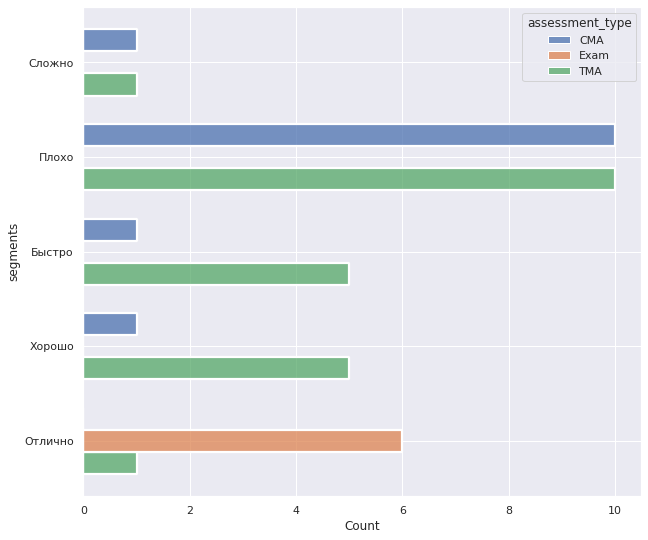

In [154]:
# теперь визуализирую данные по типу аттестации
sns.set(rc={'figure.figsize':(10,9)})
graph_test = sns.histplot(data=rfm_full, y="segments", binwidth= 20, hue = 'assessment_type', 
                     multiple="dodge", shrink=.7)


Exam - лучший вид аттестации) Долгие сроки сдачи, высокая завершаемость, высокие баллы

CMA - высокая частота по критерию "плохо". Возможно, компьютерные тесты не так привлекательны + бездушные машины не оставляют шансов на сдачу на софтах)

TMA - середняк, дискуссионный тип оценивания. Оценки преподавателя (вероятно по портфолио или очному тестирванию)

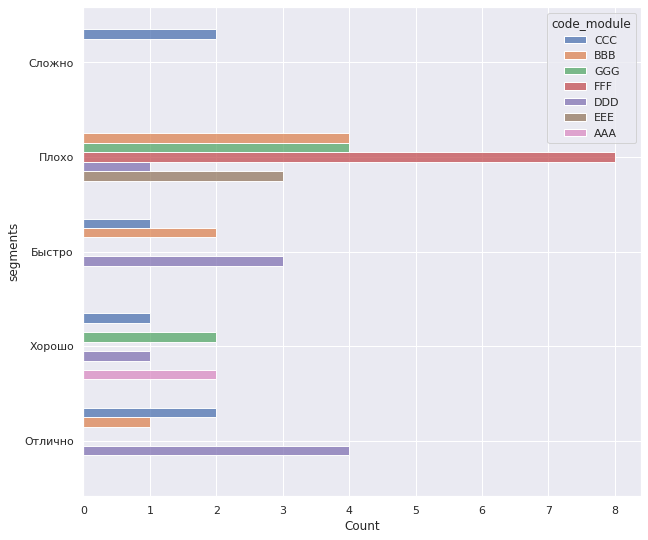

In [156]:
# теперь визуализирую данные по предмету
graph = sns.histplot(data=rfm_full, y="segments", binwidth= 10, hue = 'code_module', 
                     multiple="dodge", shrink=.7)

Предмет DDD скорее всего один из лидеров по адекватности оценки и вовлеченности студентов, много отличных тестов, много быстрых, хорошие и плохие на равно

Предмет ССС так же хорош (из предыдущих шагов, помню что именно комбинация ССС+DDD составляет курс), но при этом тесты попадают в категорию сложных

В ААА много хорощих тестов, при этом в другие сегменты предмет не попал

В аутсайдерах - BBB, ЕЕЕ и FFF, очень много плохих тестов 

У предмета GGG - перевес в сторону плохих тестов (соотношение 2:1)


Cтоит проработать оценивание предметов BBB, ЕЕЕ, FFF, GGG

Хорошо система оценивания работает на AAA, CCC, DDD

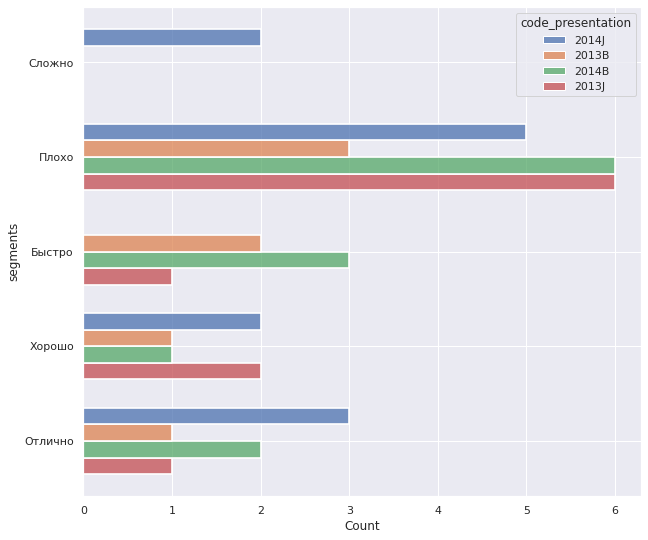

In [157]:
# теперь визуализирую данные по семестрам
graph_test = sns.histplot(data=rfm_full, y="segments", binwidth= 10, hue = 'code_presentation', 
                     multiple="dodge", shrink=.7)

Эти данные выглядят довольно равномерно, всплеск "плохо" обусловлен тем, что бОльшее количество предметов генерируют плохие оценки \ не_сдачи. Особенных закономерностей я тут не вижу

<b>Общий ответ на 6 вопрос / краткие выводы</b>

Для формирования кластеров я использовал перцентили (а именно терцили)

Ключевые показатели: R(долгий срок сдачи экзамена), F(высокая завршаемость), М(высокий средний балл)

Полученные сегменты:

Отлично (тесты долго удерживают студентов, завершаемость выше среднего, средний балл высок)

Хорошо (срок сдачи +/- средний, завершаемость так же, средний был умеренный)

Плохо (быстрый срок сдачи, низкая завершаемость, низкий балл)

Сложно (долгий срок, высокая завершаемость, но низкие оценки)

Быстро (быстрый срок, высокая завершаемость, хорошие оценки)


Экзамен - лучший вариант тестирования, все ключевые показатели высокие

CMA - худший вариант тестирования

Хорошие варианты оценивания у предметов AAA, CCC, DDD

Плохие варианты оценивания у BBB, ЕЕЕ, FFF, GGG - думаю, что нужно пересмотреть программу/логику/методы оценивания